In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from enum import IntEnum

In [2]:
data_path = "data"
cache_path = Path(data_path) / "ts-eghash/app_data_bad_detections/annotations_20200910_combined_histograms.csv"
out_path = Path.cwd()

In [10]:
class MaskType(IntEnum):
    no_mask = 1
    skin = 2
    grab_cut = 3
if cache_path.is_file():
    df = pd.read_pickle(cache_path)

In [11]:
df.head()

,Unnamed: 0,hyperlink,lighting_x,sharpness_x,cropping_quality_x,nfiq_level,nfiq_value,histogram_list,min_file_mean,image_name,...,hist_lap_75_bins_-150_150,hist_lap_100_bins_-150_150,hist_lap_10_bins_-200_200,hist_lap_25_bins_-200_200,hist_lap_50_bins_-200_200,hist_lap_75_bins_-200_200,hist_lap_100_bins_-200_200,y_std_mean,y_std,y_mean
0,0,"=HYPERLINK(""https://s3.console.aws.amazon.com/...",imbalanced,somewhat_clear,good,5.0,0.90,[17 88 11 7 25 0 0 0 0 2],0.225987,NaN,...,"[13.0, 1.0, 2.0, 0.0, 1.0, 1.0, 2.0, 4.0, 5.0,...","[13.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 2.0,...","[13.0, 9.0, 76.0, 526.0, 28913.0, 35503.0, 448...","[5.0, 6.0, 2.0, 3.0, 6.0, 16.0, 30.0, 63.0, 14...","[5.0, 0.0, 0.0, 6.0, 2.0, 0.0, 0.0, 3.0, 1.0, ...","[5.0, 0.0, 0.0, 0.0, 5.0, 1.0, 2.0, 0.0, 0.0, ...","[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 1.0, ...","[70.62676134149655, 119.066650390625]",70.626761,119.066650
1,1,"=HYPERLINK(""https://s3.console.aws.amazon.com/...",imbalanced,somewhat_clear,bad,5.0,0.69,[ 38 178 5 7 9 0 0 2 3 2],0.183766,NaN,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 14.0, 212.0, 28820.0, 36345.0, 143....","[0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 15.0, 49.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[49.770659941029855, 97.12843322753906]",49.770660,97.128433
2,2,"=HYPERLINK(""https://s3.console.aws.amazon.com/...",imbalanced,somewhat_clear,bad,5.0,1.00,[35 75 3 7 3 0 0 0 0 0],0.159398,NaN,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 3.0, 91.0, 28645.0, 36769.0, 27.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 10.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[58.91562585705712, 94.50497436523438]",58.915626,94.504974
3,3,"=HYPERLINK(""https://s3.console.aws.amazon.com/...",imbalanced,somewhat_clear,bad,5.0,0.66,[ 42 197 17 6 9 0 0 0 1 0],0.166426,NaN,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 10.0, 248.0, 29263.0, 35784.0, 226....","[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 14.0, 54.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[50.60918197218654, 93.48622131347656]",50.609182,93.486221
4,4,"=HYPERLINK(""https://s3.console.aws.amazon.com/...",too_bright,somewhat_clear,bad,5.0,0.76,[15 37 3 9 11 0 0 0 3 2],0.250800,NaN,...,"[0.0, 1.0, 1.0, 0.0, 0.0, 3.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, ...","[0.0, 6.0, 4.0, 128.0, 26866.0, 38443.0, 89.0,...","[0.0, 0.0, 0.0, 2.0, 4.0, 1.0, 2.0, 3.0, 24.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[41.33835655285964, 183.54193115234375]",41.338357,183.541931


In [14]:
#for i in df.columns:
#    print (i)

In [6]:
eer_table_path = "df_eer_contrast_values.csv"
measure = 'contrast'
file_name = f"df_eer_{measure}_values.csv"
df_eer = pd.read_pickle(file_name)
df_eer

,model_name,bins_y,bins_lap,range,c,EER
0,y_4_lap_10_c_1__-100_100,4,10,"[-100, 100]",1,0.245329
1,y_4_lap_25_c_1__-100_100,4,25,"[-100, 100]",1,0.242057
2,y_4_lap_50_c_1__-100_100,4,50,"[-100, 100]",1,0.258736
3,y_4_lap_75_c_1__-100_100,4,75,"[-100, 100]",1,0.261479
4,y_4_lap_100_c_1__-100_100,4,100,"[-100, 100]",1,0.264861
5,y_8_lap_10_c_1__-100_100,8,10,"[-100, 100]",1,0.213448
6,y_8_lap_25_c_1__-100_100,8,25,"[-100, 100]",1,0.215663
7,y_8_lap_50_c_1__-100_100,8,50,"[-100, 100]",1,0.229918
8,y_8_lap_75_c_1__-100_100,8,75,"[-100, 100]",1,0.229598
9,y_8_lap_100_c_1__-100_100,8,100,"[-100, 100]",1,0.232451


In [32]:
d = df_eer.loc[df_eer["model_name"]=="y_4_lap_10_c_1__-100_100"]
len(d)

1

In [25]:
a=1050
r = [-555, 555]
new_row = {'bins_y':a, 'bins_lap':2000, 'range':r, 'c':1, 'EER':0.0}
print(new_row)
df_eer = df_eer.append(new_row, ignore_index = True)
df_eer


{'bins_y': 1050, 'bins_lap': 2000, 'range': [-555, 555], 'c': 1, 'EER': 0.0}


,bins_y,bins_lap,range,c,EER
0,4,10,"[-100, 100]",1,0.245329
1,4,25,"[-100, 100]",1,0.242057
2,4,50,"[-100, 100]",1,0.258736
3,4,75,"[-100, 100]",1,0.261479
4,4,100,"[-100, 100]",1,0.264861
5,8,10,"[-100, 100]",1,0.213448
6,8,25,"[-100, 100]",1,0.215663
7,8,50,"[-100, 100]",1,0.229918
8,8,75,"[-100, 100]",1,0.229598
9,8,100,"[-100, 100]",1,0.232451


In [7]:
df_eer["range"] = df_eer["range"].apply(lambda x:np.array(x))

In [26]:
hist_lap_ranges_full = np.array([[-100,100], [-150,150], [-200,200]])
bins_y = [4,8,16,32,64]
bins_laplacian = [10,25,50,75,100, 200]
learning_rates = [.001, .009, .01, .09, 1]
r = hist_lap_ranges_full[0]
df_eer['selection_range'] = df_eer['range'].apply(lambda x: (x[0]==r[0])&(x[1]==r[1]))
df_eer['selection_c'] = df_eer['c'].apply(lambda x: x==1)
selection = np.logical_and(df_eer['selection_c'], df_eer['selection_range'])
df_eer_temp = df_eer[selection]
total_obs = len(bins_y) * len(bins_laplacian)
print(len(df_eer_temp))
#assert total_obs == len(df_eer_temp), "ERROR: should have "+ str(total_obs) + " observations"

30


In [49]:
df_eer

,model_name,bins_y,bins_lap,range,c,EER,selection,selection_range,selection_c
0,y_4_lap_10_c_1__-100_100,4.0,10.0,"[-100, 100]",1.000,0.245329,True,False,True
1,y_4_lap_25_c_1__-100_100,4.0,25.0,"[-100, 100]",1.000,0.242057,True,False,True
2,y_4_lap_50_c_1__-100_100,4.0,50.0,"[-100, 100]",1.000,0.258736,True,False,True
3,y_4_lap_75_c_1__-100_100,4.0,75.0,"[-100, 100]",1.000,0.261479,True,False,True
4,y_4_lap_100_c_1__-100_100,4.0,100.0,"[-100, 100]",1.000,0.264861,True,False,True
5,y_8_lap_10_c_1__-100_100,8.0,10.0,"[-100, 100]",1.000,0.213448,True,False,True
6,y_8_lap_25_c_1__-100_100,8.0,25.0,"[-100, 100]",1.000,0.215663,True,False,True
7,y_8_lap_50_c_1__-100_100,8.0,50.0,"[-100, 100]",1.000,0.229918,True,False,True
8,y_8_lap_75_c_1__-100_100,8.0,75.0,"[-100, 100]",1.000,0.229598,True,False,True
9,y_8_lap_100_c_1__-100_100,8.0,100.0,"[-100, 100]",1.000,0.232451,True,False,True


1


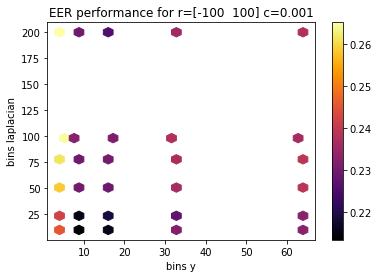

2


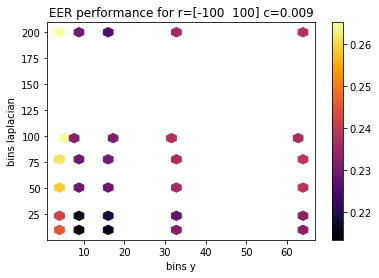

3


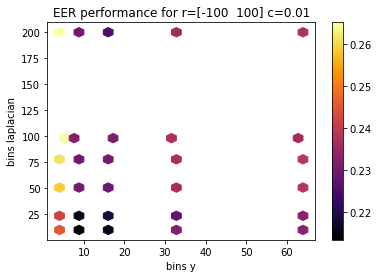

4


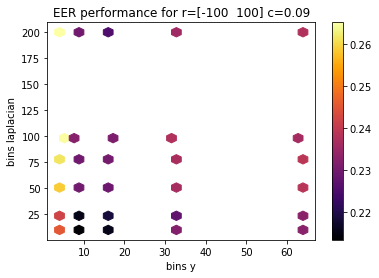

5


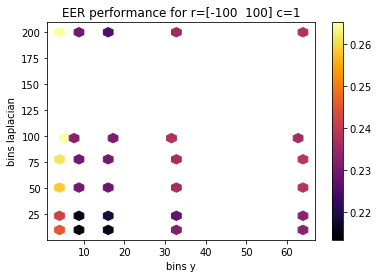

6


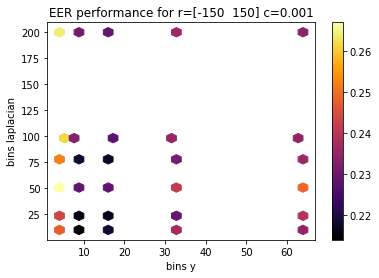

7


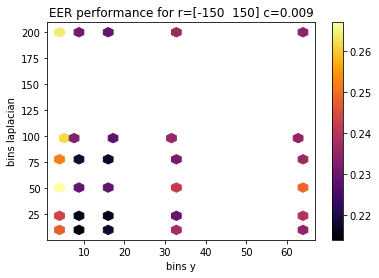

8


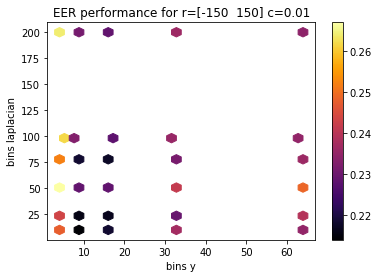

9


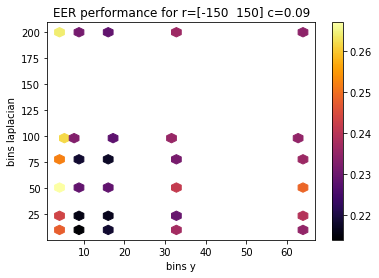

10


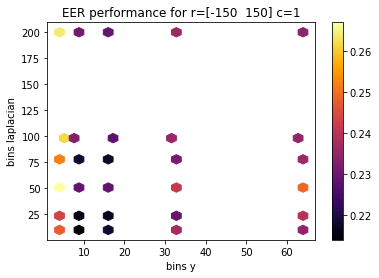

11


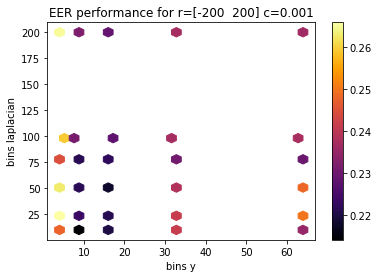

12


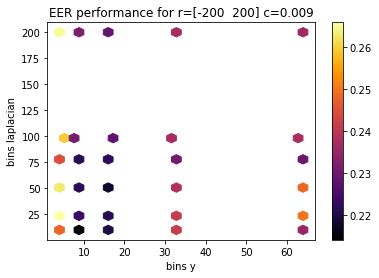

13


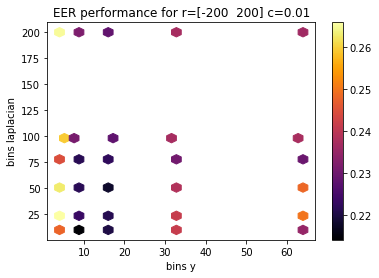

14


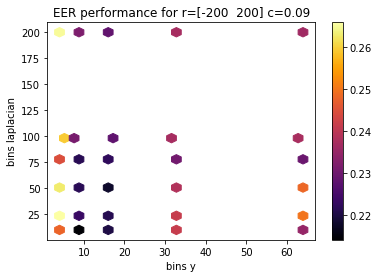

15


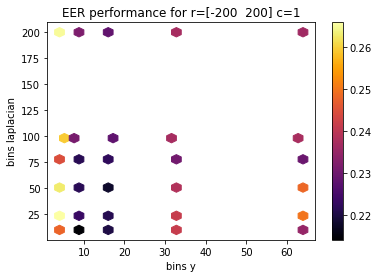

In [50]:
hyperparameters = ["bins_y", "bins_lap", "c"]
df_eer[hyperparameters] = df_eer[hyperparameters].astype(float)
hist_r = df_eer['range']
c = df_eer['c']

import matplotlib.pyplot as plt

fig_count = 0
for r in hist_lap_ranges_full:
    for learning_rate in learning_rates:
        fig_count = fig_count + 1
        print(fig_count)
        fig = plt.figure(fig_count)
        ax = plt.axes()

        df_eer['selection_range'] = df_eer['range'].apply(lambda x: (x[0]==r[0])&(x[1]==r[1]))
        df_eer['selection_c'] = df_eer['c'].apply(lambda x: x==1)
        selection = np.logical_and(df_eer['selection_c'], df_eer['selection_range'])
        df_eer_temp = df_eer[selection]
        hb  = plt.hexbin(
            x=df_eer_temp['bins_y'].values,
            y=df_eer_temp['bins_lap'].values,
            C=df_eer_temp['EER'],
            gridsize=25,
            cmap='inferno')
        cb = fig.colorbar(hb, ax=ax)
        ax.set_title("EER performance for r="+str(r) + " c="+str(learning_rate))
        plt.xlabel("bins y")
        plt.ylabel("bins laplacian")
        plt.show()
        


In [56]:
print("Best EER")
#df_eer.loc[df_eer.EER == df_eer.EER.min()]
df_eer[df_eer.EER == df_eer.EER.min()]

Best EER


,model_name,bins_y,bins_lap,range,c,EER,selection,selection_range,selection_c
173,y_8_lap_10_c_0.09__-200_200,8.0,10.0,"[-200, 200]",0.09,0.211972,False,True,False
